<a href="https://colab.research.google.com/github/ana-arcila/FisicaExperimental/blob/main/Histogramas_Sonido_Blanco_y_Rosa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TAREA 1-20221: Estadística, Teoréma del límite central, error estándar,  y error en el error.

Nombre: Greither Scarleth Quinayás Muñoz, Ana Maria Arcila Ortiz

documento: 1002959933, 1005896770

______________


##  Recopilación de datos.

* Cargue el archivo proporcionado `LenaCrip.png.PNG` y abralo usando:

    ```python
    import numpy as np`
    import pylab as plt
    from imageio import imread

    Ima = imread('LenaCrip.png.PNG')[:,:,0]
    forma = np.shape(Ima)
    datos = np.reshape(Ima,(np.size(Ima),1)).astype('int')[:,0]
    print('Tamaño archivo original = %d'%(len(datos)))
    ```

    Con esto, tendra un arreglo `datos` donde se encuentran los valores experimentales de una variable que se pretende medir (nivel de gris).



*  Realizar un montaje con Arduino en el cual pueda recopilar al menos 500 datos de ruido a partir del [sensor se sonido](https://sensorkit.arduino.cc/sensorkit/module/lessons/lesson/06-the-sound-sensor) y guardarlo en un archivo de texto. Para recopilar los datos puede usar como base el siguiente programa.

    ```cpp
    int sound_sensor = A2; //assign to pin A2
    
    void setup() 
    {
    Serial.begin(9600); //begin Serial Communication
    }
    
    void loop()
    {
    int soundValue = 0; //create variable to store many different readings
    for (int i = 0; i < 32; i++) //create a for loop to read 
    { soundValue += analogRead(sound_sensor);  } //read the sound sensor
    
    soundValue >>= 5; //bitshift operation 
    Serial.println(soundValue); //print the value of sound sensor

    delay(50); //a shorter delay between readings
    }
```
    Con lo anterior, construya dos conjuntos de datos, uno de RUIDO BLANCO y uno de RUIDO ROSA (o AZUL) y carguelos a python.
    
    **NOTA** : Para generar el ruido puede usar la app para celular "Noise Generator".


## Preguntas (Responder para cada conjunto de datos)
### 1. Grafique el histograma de los datos con 30 intervalos (bins) y diga si su forma se corresponde a la forma de una distribución gaussiana. Determine la media aritmética y la desviación estándar (desviación típica).

---
**para los siguientes ejercicios**

* considere el arreglo datos como todos los posibles valores de la variable experimental que quiere medir que puede obtener. Y para cada una de las preguntas siguientes tome los $n$ valores de la variable experimental usando la función `np.random.choice(datos,n)`. Para que los valores aleatorios no cambien entre corridas de su código, use la función `np.random.seed(0)` antes de `np.random.choice()`.

**Nota**: además de reportar el valor experimental con su error estándar, imprima también sin formato los valores del valor central, el error estándar, y el error en el error. Por ejemplo para $n = 10$ datos:

```
n = 10
media = 79.800000
error = 14.451298
error error = 3.406203
```
Valor a reportar = $80 \pm 14$

---

### 2. Para corroborar el teorema del limite central, agrupe los datos de las distribuciones originales en muestras de 100, 500, y 2000 (si es posible) y calcule el promedio de cada grupo, a partir de estos promedios construya una nueva distribución (se grafica el histograma y se ajusta a una distribución normal).¿Qué pasa con la media para cada tamaño, cambia? ¿Qué pasa con la desviación estándar?¿La distribución se asemeja a una gaussiana?

### 3. Tomando como valor "exacto" de la variable física particular como el promedio determinado en el primer punto. Tome 100, 500 y 2000 (si es posible) datos de forma aleatoria y calcule el valor promedio y el error estándar. Reporte la diferencia porcentual con el valor "exacto". ¿El valor exacto está contenido en el intervalo reportado? ¿los valores obtenidos se corresponden con los del punto anterior? 

*HINT* : Use la expresión de error en el error para determinar el número de cifras significativas del error estándar que va a reportar. 


### 4. Concluya: ¿Qué logra a medida que la muestra es más grande? ¿Qué pasa si las distribuciones no son originalmente gaussinasa? ¿Le sirve la desviación estándar para reportar una media con una incertidumbre cada vez menor?


###5. (Usar los datos de `LenaCrip.png.PNG`) Suponiendo que la **apreciación** del instrumento de medida es $\alpha_{ap}=\pm 1$, determine cual es el número de datos máximo que vale la pena medir antes que el error inducido por la apreciación del instrumento comience a predominar. Reporte el valor promedio de nivel de gris encontrado con su incertidumbre.

*HINT* : Determine cuándo el error total es igual al de apreciación. Tome como criterio en el momento en que el primer decimal se hace cero. No tiene que encontrar el número de datos exacto, se puede pasar un poco.

###La expresión para el error total $\alpha_{T}$ es:

$$\alpha_{T}^2 = \alpha_{n}^2 + \alpha_{ap}^2$$

###donde $\alpha_{n}$ corresponde al error estándar determinado con $n$ datos.

# Solución:

# 1. RUIDO BLANCO

##Punto 1:

In [ ]:
import pandas as pd
import numpy as np
dat1B=pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQc7nrXDQR8fMGZ1cgM0pJUO4ewMAdMIdEW02CoRNB2KOtVmJgPuXamjNLm3uC6MjSF35Y7SgO6Pcjc/pub?gid=1367064891&single=true&output=csv')

In [ ]:
Datblanco=dat1B.values.transpose().tolist()

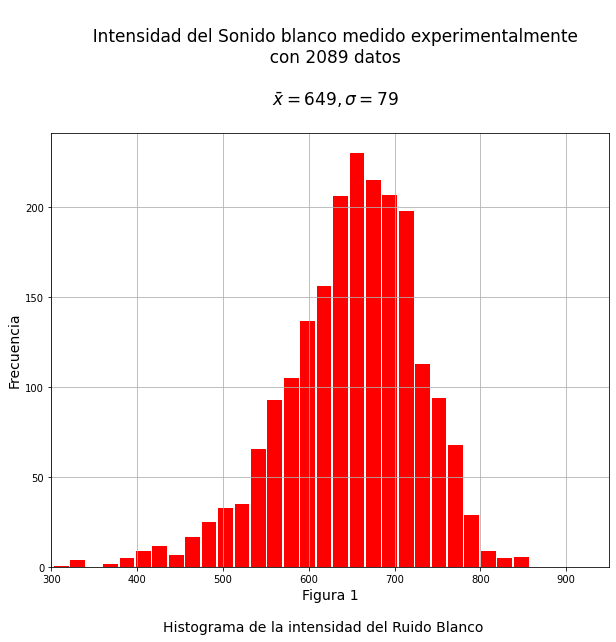

In [ ]:
#Graficando el histograma 
from scipy.stats import norm
from matplotlib import pyplot as plt 
histogram=np.histogram(Datblanco,bins=30,)
plt.figure(figsize=(10,8))
plt.hist(x=Datblanco,bins=30,color='red',rwidth=0.90)
plt.xlabel('''Figura 1

Histograma de la intensidad del Ruido Blanco   ''',size=14)
plt.ylabel('Frecuencia',size=14)
plt.grid(True)
plt.xlim(300,950)
prom=np.mean(Datblanco)
desvestB=np.std(Datblanco)
plt.title(r'''
  Intensidad del Sonido blanco medido experimentalmente
  con %.f datos
   
  $ \bar{x}=%.f, \sigma=%.f$
  '''%(len(Datblanco[0]), prom, desvestB), size = 17)
plt.show()

## Punto 2:


In [ ]:
from ipywidgets import interact

def func(n=100):
  np.random.seed(1)
  
  dat = np.random.choice(Datblanco[0], n)

  ndist= [np.mean(np.random.choice(Datblanco[0],n)) for i in range(0,len(Datblanco),n)]

  plt.figure(figsize=(10,8))
  _ ,bins, _ =plt.hist(dat,bins=30,facecolor='red',rwidth=0.90)
  
  mu=np.mean(ndist)
  sumatoria = sum((dat - mu) ** 2)
  desvEst = np.sqrt(sumatoria / n - 1)

  plt.xlabel('Intensidad', size = 14)
  plt.ylabel('Frecuencia ', size = 14)
  plt.title(r'''
  Intensidad del Sonido blanco medido experimentalmente
  con %.f datos
   
  $ \bar{x}=%.f, \sigma=%.f$
  '''%(n, mu, desvEst), size = 17)
  plt.grid(True)
  plt.show()

  errEst = desvEst / np.sqrt(n)
  print('Error estándar predicho  por la ecuación: %.4f'%(errEst))
  errErr = 1 / np.sqrt(2 * n - 2)
  print('El valor a reportar ahora es %.1f +/- %.1f'%(mu, errEst))

interact(func,n=[100,500,2000])

interactive(children=(Dropdown(description='n', options=(100, 500, 2000), value=100), Output()), _dom_classes=…

<function __main__.func>

##Punto 3:

In [ ]:

def ErrRel(n):
  np.random.seed(1)
  dat = np.random.choice(Datblanco[0], n)
  xExp = np.mean(dat)
  errRela = abs(xExp - prom) * 100 / prom 
  return print("El error relativo porcentual de", n, "repeticiones es: \n %.2f \n"%(errRela))

interact(ErrRel, n=[100,500,2000])

interactive(children=(Dropdown(description='n', options=(100, 500, 2000), value=100), Output()), _dom_classes=…

<function __main__.ErrRel>

# 2. RUIDO ROSA

##Punto 1:

In [ ]:
import pandas as pd
dat1R=pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQc7nrXDQR8fMGZ1cgM0pJUO4ewMAdMIdEW02CoRNB2KOtVmJgPuXamjNLm3uC6MjSF35Y7SgO6Pcjc/pub?gid=1208957300&single=true&output=csv');dat1R


,303
0,383
1,761
2,571
3,666
4,711
...,...
2458,693
2459,270
2460,538
2461,316


In [ ]:
DatRosa=dat1R.transpose().values.tolist()

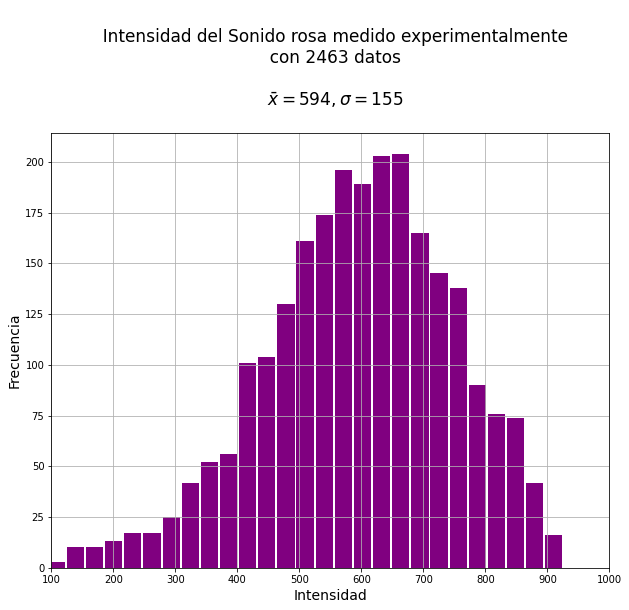

In [ ]:
#Graficando el histograma 
from scipy.stats import norm
from matplotlib import pyplot as plt 
histogram=np.histogram(DatRosa,bins=30,)
plt.figure(figsize=(10,8))
plt.hist(x=DatRosa,bins=30,color='purple',rwidth=0.90)
plt.xlabel('Intensidad',size=14)
plt.ylabel('Frecuencia',size=14)
plt.grid(True)
plt.xlim(100,1000)
promR=np.mean(DatRosa)
desvestR=np.std(DatRosa)
plt.title(r'''
  Intensidad del Sonido rosa medido experimentalmente
  con %.f datos
   
  $ \bar{x}=%.f, \sigma=%.f$
  '''%(len(DatRosa[0]), promR, desvestR), size = 17)
plt.show()

## Punto 2:

In [ ]:
from ipywidgets import interact

def func(n=100):
  np.random.seed(1)
  
  dat = np.random.choice(DatRosa[0], n)

  ndist= [np.mean(np.random.choice(DatRosa[0],n)) for i in range(0,len(DatRosa),n)]

  plt.figure(figsize=(10,8))
  _ ,bins, _ =plt.hist(dat,bins=30,facecolor='purple',rwidth=0.90)
  
  mu=np.mean(ndist)
  sumatoria = sum((dat - mu) ** 2)
  desvEst = np.sqrt(sumatoria / n - 1)

  plt.xlabel('Intensidad', size = 14)
  plt.ylabel('Frecuencia ', size = 14)
  plt.title(r'''
  Intensidad del Sonido Rosa medido experimentalmente
  con %.f datos
   
  $ \bar{x}=%.f, \sigma=%.f$
  '''%(n, mu, desvEst), size = 17)
  plt.grid(True)
  plt.show()

  errEst = desvEst / np.sqrt(n)
  print('Error estándar predicho  por la ecuación: %.4f'%(errEst))
  errErr = 1 / np.sqrt(2 * n - 2)
  print('El valor a reportar ahora es %.1f +/- %.1f'%(mu, errEst))

interact(func,n=[100,500,2000])

interactive(children=(Dropdown(description='n', options=(100, 500, 2000), value=100), Output()), _dom_classes=…

<function __main__.func>

##Punto 3:

In [ ]:
def ErrRelR(m):
  np.random.seed(1)
  datR = np.random.choice(DatRosa[0], m)
  xExpR = np.mean(datR)
  errRelaR = abs(xExpR - promR) * 100 / promR
  return print("El error relativo porcentual de", m, "repeticiones es: \n %.4f \n"%(errRelaR))

interact(ErrRelR, m=[100,500,2000])

interactive(children=(Dropdown(description='m', options=(100, 500, 2000), value=100), Output()), _dom_classes=…

<function __main__.ErrRelR>

#Análisis puntos 1-4:

1. En cuanto a su forma no es perfectamente una distribución Gaussiana  debido a diversos factores experimentales pero se puede ver claramente que los valores tienden a una distribución normal.

2. Los promedios de las diferentes muestras tomadas oscilan en un intervalo cercano al promedio "exacto". En la desviación estándar, esta va disminuyendo a medida que aumenta el número de datos, acercandose a la desviación estándar tomada con el número total de datos. En todos los histogramas graficados, se puede ver una figura que se asemeja a una distribución gaussiana.

3. En cinco de los seis casos el promedio exacto se encuentra dentro del intervalo que da el error relativo. En el caso que no se da, el valor sigue siendo muy cercano al promedio. Los valores del error relativo son relativamente cercanos a los de los errores estándar encontrados, pero no son iguales a estos.

4. A medida que la muestra es más grande, el error estándar va disminuyendo, el histograma se acerca más a una distribución gaussiana, el error relativo dismunuye y el promedio se acerca al valor teórico. Si la distribución no es originalmente gaussiana, esta se puede ajustar para que sea descrita por una gaussiana, pero la función no va a representar tan cercanamente a los datos. Si se reporta el promedio con la desviación estándar, se está reportando más error del necesario, ya que el error estándar dismunuye a medida de que se toman más medidas.

#Punto 5:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
  import numpy as np
  import pylab as plt
  from imageio import imread

  Ima = imread('/content/drive/MyDrive/LenaCrip.png.PNG')[:,:,0]
  forma = np.shape(Ima)
  datos = np.reshape(Ima,(np.size(Ima),1)).astype('int')[:,0]
  print('Tamaño archivo original = %d'%(len(datos)))

Tamaño archivo original = 512864


In [ ]:
avg = sum(datos) / len(datos)
apreciacion = 1.0
n = 2
A = sum((datos - avg) ** 2)
desvEst = np.sqrt(A / (n - 1))
errorEst = desvEst / np.sqrt(n)
errorTotal = np.sqrt(errorEst * errorEst + apreciacion * apreciacion)
print(desvEst)

while apreciacion + 0.01 < errorTotal:
  desvEst = np.sqrt(A / (n - 1))
  errorEst = desvEst / np.sqrt(n)
  errorTotal = np.sqrt(errorEst * errorEst + apreciacion * apreciacion)
  n += 1

print("\nEl número de datos que se puede realizar antes de que la apreciación predomine el error total es", n, "repeticiones.")

18486.807016742547

El número de datos que se puede realizar antes de que la apreciación predomine el error total es 130398 repeticiones.
